# Qiskit testing with classification problems

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Part 1 - Data Preprocessing

### Importing dataset

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
x_test.shape

(10000, 28, 28)

### Apply a PCA to reduce dimensionality

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Flatten the images to 1D arrays
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)


# Step 2: Standardize the data
scaler = StandardScaler()
x_train_flattened_standardize = scaler.fit_transform(x_train_flattened)
x_test_flattened_standardize = scaler.transform(x_test_flattened)

# Step 3: Create and fit the PCA model
n_components = 2  # Replace with the desired number of components 'n'
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_flattened_standardize)
x_test_pca = pca.transform(x_test_flattened_standardize)

### Features Scaling

In [5]:
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler()
#X_train = sc.fit_transform(train_features)
#X_test = sc.transform(test_features)

## Part 2 - Training Quantum Machine Learning Classifier

### Feature Map

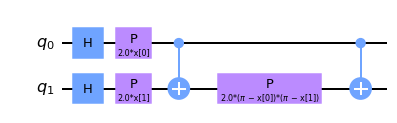

In [16]:
from qiskit.circuit.library import ZZFeatureMap

num_features = x_train_pca.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=40)

### Ansatz

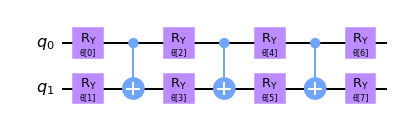

In [17]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=40)

### Optimization Algorithm

In [18]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=30)

### Define callback function (optional)

In [21]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

### Training model on Train dataset

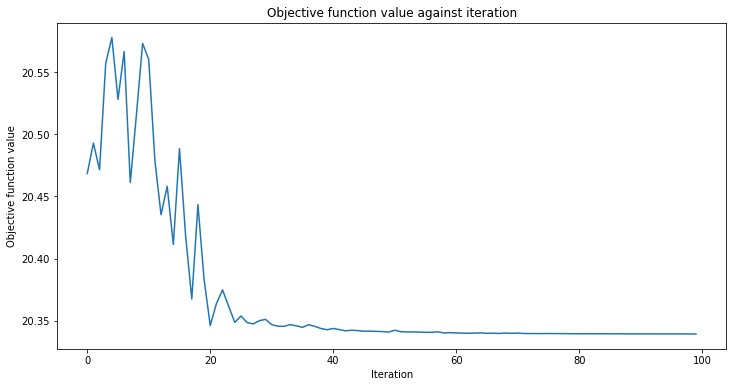

Training time: 27608 seconds


In [22]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    loss="cross_entropy",
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(x_train_pca, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

## Part 4 - Testing on test dataset and evaluating model

In [23]:
train_score_q4 = vqc.score(x_train_pca, y_train)
test_score_q4 = vqc.score(x_test_pca, y_test)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.10
Quantum VQC on the test dataset:     0.10


In [24]:
y_pred = vqc.predict(x_test_pca)

In [25]:
print(y_pred)

[3 0 1 ... 2 2 1]
